In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('wordnet')
import re
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prani\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 1. DATA PREPARATION

In [2]:
df = pd.read_table('C:/Users/prani/Downloads/amazon_reviews_us_Beauty_v1_00.tsv.gz', on_bad_lines='skip')

In [3]:
df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,1797882,R3I2DHQBR577SS,B001ANOOOE,2102612,The Naked Bee Vitmin C Moisturizing Sunscreen ...,Beauty,5,0.0,0.0,N,Y,Five Stars,"Love this, excellent sun block!!",2015-08-31
1,US,18381298,R1QNE9NQFJC2Y4,B0016J22EQ,106393691,"Alba Botanica Sunless Tanning Lotion, 4 Ounce",Beauty,5,0.0,0.0,N,Y,Thank you Alba Bontanica!,The great thing about this cream is that it do...,2015-08-31
2,US,19242472,R3LIDG2Q4LJBAO,B00HU6UQAG,375449471,"Elysee Infusion Skin Therapy Elixir, 2oz.",Beauty,5,0.0,0.0,N,Y,Five Stars,"Great Product, I'm 65 years old and this is al...",2015-08-31
3,US,19551372,R3KSZHPAEVPEAL,B002HWS7RM,255651889,"Diane D722 Color, Perm And Conditioner Process...",Beauty,5,0.0,0.0,N,Y,GOOD DEAL!,I use them as shower caps & conditioning caps....,2015-08-31
4,US,14802407,RAI2OIG50KZ43,B00SM99KWU,116158747,Biore UV Aqua Rich Watery Essence SPF50+/PA+++...,Beauty,5,0.0,0.0,N,Y,this soaks in quick and provides a nice base f...,This is my go-to daily sunblock. It leaves no ...,2015-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5094302,US,50113639,RZ7RZ02MTP4SL,B000050B70,185454094,Conair NE150NSCS Cordless Nose and Ear Hair Tr...,Beauty,5,10.0,10.0,N,N,Great Little Grooming Tool,After watching my Dad struggle with his scisso...,2000-11-12
5094303,US,52940456,R2IRC0IZ8YCE5T,B000050FF2,678848064,Homedics Envirascape Sound Spa Alarm Clock Radio,Beauty,3,23.0,23.0,N,N,Not bad for the price,"Like most sound machines, the sounds choices a...",2000-11-07
5094304,US,47587881,R1U4ZSXOD228CZ,B000050B6U,862195513,Conair Instant Heat Curling Iron,Beauty,5,89.0,97.0,N,N,Best Curling Iron Ever,I bought this product because it indicated 30 ...,2000-11-02
5094305,US,53047750,R3SFJLZE09URWM,B000050FDE,195242894,Oral-B Professional Care 1000 Power Toothbrush,Beauty,5,10.0,10.0,N,N,"The best electric toothbrush ever, REALLY!",We have used Oral-B products for 15 years; thi...,2000-11-01


In [4]:
df2 = df[["star_rating","review_body"]]
df2

,star_rating,review_body
0,5,"Love this, excellent sun block!!"
1,5,The great thing about this cream is that it do...
2,5,"Great Product, I'm 65 years old and this is al..."
3,5,I use them as shower caps & conditioning caps....
4,5,This is my go-to daily sunblock. It leaves no ...
...,...,...
5094302,5,After watching my Dad struggle with his scisso...
5094303,3,"Like most sound machines, the sounds choices a..."
5094304,5,I bought this product because it indicated 30 ...
5094305,5,We have used Oral-B products for 15 years; thi...


### We only take the random 20000 rows from the data having ratings 1 and 2, 20000 rows from the data having rating 3 and 20000 rows from the data having rating 4 and 5. We use sample() to choose the random 20000 rows from the dataframe. We then take all the dataframes with 20000 rows having each class into a new dataframe with 60000 rows.


In [5]:
c1 = df2[df2['star_rating'] == '1']
c2 = df2[df2['star_rating'] == '2']
frames = [c1,c2]
class1 = pd.concat(frames)
cls1 = class1.sample(20000)
c3 = df2[df2['star_rating'] == '3']
cls2 = c3.sample(20000)
c4 = df2[df2['star_rating'] == '4']
c5 = df2[df2['star_rating'] == '5']
frames1 = [c4,c5]
class3 = pd.concat(frames1)
cls3 = class3.sample(20000)
frames2 = [cls1,cls2,cls3]

In [6]:
samp = pd.concat(frames2)
samp

,star_rating,review_body
2247814,1,"They are too small, and it break the hair its ..."
1795551,1,It's fake and smell is horrible.
562454,2,This smells like diarrhea! I tried it three ti...
295866,1,First off let me say I absolutely LOVE Demi. I...
1116206,1,Very small but husband said it'll do
...,...,...
2270386,5,Excellent
194257,5,Good Stuff
1524397,5,Love the natural ingredients and the pricing.
1208842,5,This blade works very well for me. Very happy !


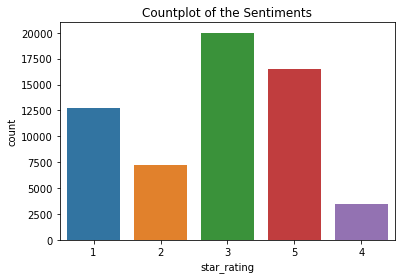

In [7]:
sns.countplot(samp.star_rating)
plt.title('Countplot of the Sentiments')
plt.show()

# 2. DATA CLEANING

In [8]:
len_before_DC = samp['review_body'].str.len().mean()
samp['review_body'] = samp['review_body'].str.replace('http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', ' ')
samp['review_body'] = samp['review_body'].str.replace(r'<[^<>]*>', '', regex=True)
len_before_DC

189.06201033505585

In [9]:
import sys 
!{sys.executable} -m pip install contractions
import contractions
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace(x, contractions.fix(x))
        return x
    else:
        return x
samp['review_body'] = samp['review_body'].apply(lambda x : cont_to_exp(x))
samp = samp.apply(lambda x: x.astype(str).str.lower())
samp['review_body'] = samp['review_body'].str.replace('[^a-z]', ' ')
samp['review_body'] = samp['review_body'].str.replace(' ', ' ')


In [10]:
len_after_DC = samp['review_body'].str.len().mean()
print('Average length of the reviews before and after data cleaning respectively:', len_before_DC, ',', len_after_DC)

Average length of the reviews before and after data cleaning respectively: 189.06201033505585 , 188.6813


# 3. DATA PREPROCESSING

In [11]:
import nltk
from nltk.corpus import stopwords


In [12]:
def class_category(row):
    if row['star_rating'] == '1' or row['star_rating'] == '2':
        val = 1
    elif row['star_rating'] == '3':
        val = 2
    else:
        val = 3
    return val
samp['classification'] = samp.apply(class_category, axis=1)

# Word2Vec

In [13]:
pip install gensim


Note: you may need to restart the kernel to use updated packages.


In [14]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

In [15]:
embeddings = []
for review in samp['review_body']:
    sample = []
for word in review:
    if word in wv.key_to_index:
        word_embed = wv[word]
        sample.append(word_embed)
        embeddings.append(sample)

In [16]:
print("excellent - outstanding: ", wv.similarity('excellent','outstanding'))
print("woman - girl: ", wv.similarity('woman','girl'))
print("summer - winter: ", wv.similarity('summer','winter'))


excellent - outstanding:  0.5567486
woman - girl:  0.7494641
summer - winter:  0.7155519


In [18]:
r_list = []
for r in samp['review_body']:
    r_list.append(r.split())

from gensim.models import Word2Vec
wvmodel = Word2Vec(sentences=r_list,vector_size=300,window=13,min_count=9)


In [19]:
try:
    print("excellent - outstanding: ", wvmodel.wv.similarity('excellent','outstanding'))
    
except:
    pass
try:
    print("woman - girl: ", wvmodel.wv.similarity('woman','girl'))
except:
    pass
try:
    print("summer - winter: ", wvmodel.wv.similarity('summer','winter'))
except:
    pass

excellent - outstanding:  0.66893923
woman - girl:  0.66677
summer - winter:  0.73808956


In [19]:
## After comparing the vectors generated by the pre-trained Word2Vec model and the model trained on the dataset, 
#it is evident that the pre-trained model encodes the similarities between words more accurately

## Simple models

In [20]:
x=[]
y=[]
for i, row in samp.iterrows():
    vec = []
    for word in row['review_body'].split():
        if word in wv.key_to_index:
            vec.append(wv[word])
    if vec:
        vec = sum(vec) / len(vec)
        x.append(vec)
        y.append(row['classification'])


In [21]:
def printMetrics(y_test, label):
    cr = classification_report(y_test, label, output_dict=True)
    report = pd.DataFrame(cr).transpose()
    for i in range(4):
        if i==3:
            print(f'Averages: {report.iloc[i+1]["precision"]}, {report.iloc[i+1]["recall"]}, {report.iloc[i+1]["f1-score"]}\n')
        else:
            print(f'Class {i+1}: {report.iloc[i]["precision"]}, {report.iloc[i]["recall"]}, {report.iloc[i]["f1-score"]}\n')

In [22]:
# splitting into training and testing:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,stratify=y)

## Using word2vec

### Perceptron

In [23]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = Perceptron()
model.fit(x_train, y_train)
labelPredict = model.predict(x_test)
accuracy_score(y_test, labelPredict)

printMetrics(y_test, labelPredict) 

Class 1: 0.6599370739381227, 0.6298798798798799, 0.6445582586427657

Class 2: 0.5566446318668794, 0.6115702479338843, 0.5828162291169451

Class 3: 0.7444326617179216, 0.7048192771084337, 0.7240845796802476

Averages: 0.6536714558409745, 0.6487564683073993, 0.6504863558133195



In [24]:
# Accuracy
print("Accuracy for Perceptron - Word2Vec: ", accuracy_score(y_test, labelPredict))

Accuracy for Perceptron - Word2Vec:  0.6487095965923327


### SVM

In [25]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

SVMmodel = LinearSVC()
SVMmodel.fit(x_train, y_train)
SVMLabelPredict = SVMmodel.predict(x_test)
accuracy_score(y_test, SVMLabelPredict)

printMetrics(y_test, SVMLabelPredict) 

Class 1: 0.6661931818181818, 0.7042042042042042, 0.6846715328467152

Class 2: 0.6059165346011621, 0.5745053844227398, 0.5897930325234606

Class 3: 0.7537219278324502, 0.7497489959839357, 0.751730212658865

Averages: 0.675277214750598, 0.67615286153696, 0.6753982593430136



In [26]:
print("Accuracy for SVM - Wrod2Vec: ", accuracy_score(y_test, SVMLabelPredict))

Accuracy for SVM - Wrod2Vec:  0.676104568612712


# TFIDF

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,3))
X = vectorizer.fit_transform(samp['review_body'])


In [28]:
xt_train, xt_test, yt_train, yt_test = train_test_split(X,samp['classification'],test_size = 0.2,stratify=samp['classification'])

## Perceptron

In [29]:
from sklearn.linear_model import Perceptron

tfidfmodel = Perceptron()
tfidfmodel.fit(xt_train, yt_train)
tfidflabelPredict = tfidfmodel.predict(xt_test)
accuracy_score(yt_test, tfidflabelPredict)

printMetrics(yt_test, tfidflabelPredict) 

Class 1: 0.6946996466431096, 0.73725, 0.7153426318981201

Class 2: 0.6161149602258147, 0.60025, 0.6080790173483601

Class 3: 0.8055987558320373, 0.777, 0.7910409773479257

Averages: 0.7054711209003205, 0.7048333333333333, 0.7048208755314688



In [30]:
# Accuracy
print("Accuracy for Perceptron - TF-IDF: ", accuracy_score(yt_test, tfidflabelPredict))

Accuracy for Perceptron - TF-IDF:  0.7048333333333333


## SVM

In [31]:
from sklearn.svm import LinearSVC

tfidfSVMmodel = LinearSVC()
tfidfSVMmodel.fit(xt_train, yt_train)
tfidfSVMLabelPredict = tfidfSVMmodel.predict(xt_test)
accuracy_score(yt_test, tfidfSVMLabelPredict)

printMetrics(yt_test, tfidfSVMLabelPredict) 

Class 1: 0.7421026653504442, 0.75175, 0.7468951813214109

Class 2: 0.655154771041187, 0.64025, 0.6476166392717159

Class 3: 0.8167863332508046, 0.82475, 0.8207488493593731

Averages: 0.7380145898808119, 0.7389166666666666, 0.7384202233175



In [32]:
#Accuracy
print("Accuracy for SVM - TF-IDF: ", accuracy_score(yt_test, tfidfSVMLabelPredict))

Accuracy for SVM - TF-IDF:  0.7389166666666667


# RNN

In [33]:
vectors_five = []
labels_five = []
for i,row in samp.iterrows():
    words = row['review_body'].split()
    
    if len(words) >= 20:
        words = words[:20]
    else:
        words += [''] * (20 - len(words))

    temp_five = []
    for i, word in enumerate(words):
        if word in wv.key_to_index:
            temp_five.append(wv[word])
        else:
            temp_five.append([0]*300)

    temp_five = np.array(temp_five)
    vectors_five.append(temp_five.flatten())
    temp_five = []
    labels_five.append(row['classification'])

In [34]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [36]:
import torch
import torch.nn as nn
import torchvision
import torch.nn.utils.rnn as rnn_utils

In [37]:

vectors_five = torch.tensor(vectors_five)
labels_five = torch.tensor([int(label) for label in labels_five])

In [38]:
# Splitting into train and test
from sklearn.model_selection import train_test_split
pt_train, pt_test, qt_train, qt_test = train_test_split(vectors_five,labels_five,test_size = 0.2,stratify=labels_five)

In [39]:
for i in range(len(qt_train)):
    qt_train[i] = int(qt_train[i]) - 1
for i in range(len(qt_test)):
    qt_test[i] = int(qt_test[i]) - 1

In [40]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, batch_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.batch_size = batch_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(1, self.batch_size, self.hidden_size).to(device) 
        out, hn = self.rnn(x, h0) 
        out = self.fc(out[:, -1, :]) 
        return out

    
input_size = 6000 
hidden_size = 20
output_size = 3 
lr = 0.007
num_epochs = 100
batch_size = 32
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

rnn = RNN(input_size, hidden_size, output_size, batch_size).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(rnn.parameters(), lr=lr)

In [41]:
for epoch in range(num_epochs):
    for i in range(0, len(pt_train), batch_size):
        batch_data = pt_train[i:i+batch_size].to(torch.float32)
        batch_labels = qt_train[i:i+batch_size].to(torch.long)
#         batch_data = [data for data in batch_data]
        inputs = nn.utils.rnn.pad_sequence(batch_data, batch_first=True, padding_value=0).to(device) # pad sequences to max length
        lab = torch.tensor(batch_labels).to(device)
#         inputs = torch.tensor(inputs)
        inputs = inputs.reshape(batch_size, -1, input_size)
        outputs = rnn(inputs)
        loss = criterion(outputs, lab)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/100], Loss: 1.0742
Epoch [11/100], Loss: 0.9092
Epoch [21/100], Loss: 0.8950
Epoch [31/100], Loss: 0.8681
Epoch [41/100], Loss: 0.8299
Epoch [51/100], Loss: 0.7877
Epoch [61/100], Loss: 0.7477
Epoch [71/100], Loss: 0.7127
Epoch [81/100], Loss: 0.6846
Epoch [91/100], Loss: 0.6644


In [42]:
with torch.no_grad():
    correct = 0
    total = 0
    for i in range(0, len(pt_test), batch_size):
        batch_data = pt_test[i:i+batch_size].to(torch.float32)
        batch_labels = qt_test[i:i+batch_size].to(torch.long)
        inputs = nn.utils.rnn.pad_sequence(batch_data, batch_first=True, padding_value=0).to(device) # pad sequences to max length
        lab = torch.tensor(batch_labels).to(device)
        inputs = inputs.reshape(batch_size, -1, input_size)
        outputs = rnn(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += lab.size(0)
        correct += (predicted == lab).sum().item()

print(f'Accuracy on RNN: {correct / total:.4f}')


Accuracy on RNN: 0.6168
